In [ ]:
import pandas as pd
import numpy as np

from scipy.stats import binom

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import shapiro
from sklearn.datasets import load_iris

# 2.4
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Reconocimiento de Patrones y Aprendizaje Automatizado

## [Teoría] Tarea 1

- 421023697 - Alex Nakamura Díaz Francés
- 420003708 - David Hernández Uriostegui
- 420003007 - Diego Javier Padilla Lara
- 318163790 - Erick Daniel Arroyo Martínez
- 318685496 - Sebastián Alamina Ramírez

## 2. Probabilidad y estadística

### 1.
Considera la variable aleatoria $X\sim B(n, p)$ con una población de $n=100$ y con $p=0.08$ (y por lo tanto $q=0.92$) ¿Cuál es la probabilidad asociada para todos los valores entre 5.5 y 8?

In [ ]:
n = 100
p = 0.08

Buscamos encontrar $P(5.5\leq X\leq 8)$, o bien, $\sum_{i=6}^{8}P(X=i)$. Lo anterior se puede hacer de varias maneras:

Manera 1: Usando la función de distribución de probabilidad (CDF) y `scipy.stats.binom`

$$P(5.5\leq X\leq 8) = P(X\leq 8)-P(X\leq 5)$$

In [ ]:
print(
    "La probabilidad buscada, calculada usando la función de distribución, es:",
    binom.cdf(8, n, p) - binom.cdf(5.5, n, p),
)


La probabilidad buscada, calculada usando la función de distribución, es: 0.4127517838122473


Manera 2: Usando la función de masa (PMF) y `scipy.stats.binom`
$$P(5.5\leq X\leq 8) = P(X=6)+P(X=7)+P(X=8)$$

In [ ]:
print(
    "La probabilidad buscada, calculada usando la función de masa, es:",
    sum(binom.pmf(i, n, p) for i in range(6, 8 + 1)),
)

La probabilidad buscada, calculada usando la función de masa, es: 0.41275178381224753


Manera 3: Usando la expresión de la función de masa $P(X=i) = \binom{n}{x} p^i q^{(n-i)}$

In [ ]:
print(
    "La probabilidad buscada, calculada usando expresión de la función de masa, es:",
    sum(
        np.math.comb(n, i) * np.power(p, i) * np.power(1 - p, n - i)
        for i in range(6, 8 + 1)
    ),
)


La probabilidad buscada, calculada usando expresión de la función de masa, es: 0.4127517838122493


### 2.
Considera la v.a. continua $X$ con función de densidad como se muestra a continuación:

$f(x) = \begin{cases}
  2x & \text{si}\ 0 < x < 1 \\
  0 & \text{en otro caso}
\end{cases}$

¿Cuál es la esperanza de $X$?

**Solución**: Por definición, $E(Z) = \int_∞^∞ zf(z)\ dz$.

Entonces:

$\begin{align*} 
E(X) &= \int_{-∞}^0 x \cdot 0\ dx + \int_0^1 x \cdot 2x + \int_1^∞ x \cdot 0\ dx \\
&= \int_0^1 2x^2\ dx \\
&= \frac{2}{3}x^3 + C\ \big|_0^1 \\
&= (\frac{2}{3} \cdot 1^3 + C)-(\frac{2}{3} \cdot 0^3 + C) \\
&= \frac{2}{3}
\end{align*}$

### 3.
Implementa una función que tome un arreglo de vectores `x` y regrese dos conjuntos ajenos denominados `x_train` y `x_test`. Los parámetros que debe tomar esta función es un iterable con los vectores a separar así como un escalar `p` que indique la proporción de datos que quedará en el primer conjunto. 

Debe regresar dos iterables donde el primer conjunto tiene la proporción `p` de `x` y el segundo (1-`p`) de `x`.

In [ ]:
def repartidor(x, p=0.5, seed=0):
    rng = np.random.default_rng(seed=seed)

    n1 = int(p * len(x))

    indexes1 = set(rng.choice(range(len(x)), n1, replace=False))
    x_train, x_test = [], []
    for i, e in enumerate(x):
        if i in indexes1:
            x_train.append(e)
        else:
            x_test.append(e)
    return x_train, x_test


Ejemplo:

In [ ]:
x = [0, 2, 3, 4, 1, 8]
x_tr, x_ts = repartidor(x, 0.5, seed=11)
assert len(x_tr) == len(x) // 2
assert len(set(x_tr).intersection(set(x_ts))) == 0
print(x_tr, x_ts)

[0, 1, 8] [2, 3, 4]


### 4.
Usando el conjunto de datos de *IRIS*, haz lo siguiente usando el modelo de predicción que desees (e.g. modelo lineal, logístico, soporte vectorial, etc.)
- Determina y explica todas las métricas que pueden ser calculadas por medio de la matriz de confusión.
- Grafica la matriz de confusión y explica los valores graficados.

In [ ]:
from sklearn import datasets

# Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create the training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25 , random_state = 1, stratify = y)

# Create a pipeline with scaling and SV classification
pipe = make_pipeline(StandardScaler(), SVC())

# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

A continuación se presenta la *matriz de confusión* generada a partir del modelo de predicción *soporte vectorial* (`SVC`), la cuál nos muestra el número de **TP**, **FP**, **TN** y **FN** para cada clase del dataset *IRIS*:
- *setosa*
- *versicolor*
- *virginica*.

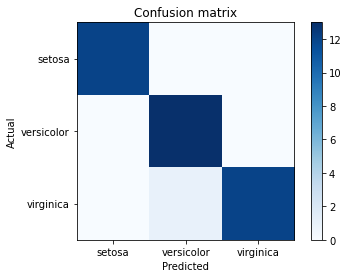

In [ ]:
# Display confusion matrix
plt.imshow(cm, cmap='Blues')
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0, 1, 2], ['setosa', 'versicolor', 'virginica'])
plt.yticks([0, 1, 2], ['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Gracias a la **matriz de confusión** nos es posible calcular métricas como:
- *Accuracy*. Que es la proporción de instancias que fueron clasificadas correctamente. Calculada como:
$$\frac{TP + TN}{PF+ TP + TN + FN}$$

- *Precision*. Se trata del ratio de verdaderos positivos respecto a las que son clasificadas (predecidas) como positivas. Se calcula de la siguiente manera:
$$\frac{TP}{TP + FP}$$

- *Recall*. También se le conoce como *sensitivity*, es la proporción de positivos verdaderos correctamente identificados. Calculada como:
$$\frac{TP}{TP + FN}$$

- *F1-Score*. Que es la media armónica de *precision* y *recall*. 
$$2 \times \frac{precision \times recall}{precision\ +\ recall}$$


Haciendo uso de la función `classification_report`, que es parte de `sklearn.metris` podemos obtener las métricas mencionadas:

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## 3. Regresión Lineal

In [ ]:
X, y = load_iris(return_X_y=True, as_frame=True)
data_iris = np.c_[X, y]
columns = list(X.columns)
columns.append("Species")
iris_df = pd.DataFrame(data=data_iris, columns=columns)

In [ ]:
iris_df['Species'] = iris_df['Species'].astype(np.int64)

In [ ]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
def analyze(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return corr_mat

In [ ]:
corr_matrix = iris_df.select_dtypes(include=['float64', 'int']).corr(method='pearson')

In [ ]:
analyze(corr_matrix)

,variable_1,variable_2,r,abs_r
13,petal length (cm),petal width (cm),0.962865,0.962865
17,petal width (cm),petal length (cm),0.962865,0.962865
19,petal width (cm),Species,0.956547,0.956547
23,Species,petal width (cm),0.956547,0.956547
14,petal length (cm),Species,0.949035,0.949035
22,Species,petal length (cm),0.949035,0.949035
10,petal length (cm),sepal length (cm),0.871754,0.871754
2,sepal length (cm),petal length (cm),0.871754,0.871754
15,petal width (cm),sepal length (cm),0.817941,0.817941
3,sepal length (cm),petal width (cm),0.817941,0.817941


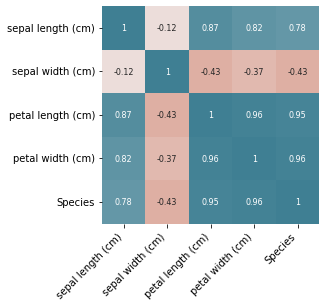

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

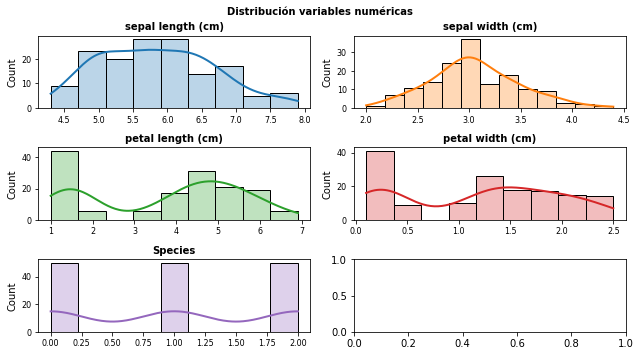

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = iris_df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = iris_df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

### 1
Al graficar individualmenre el histograma de frecuencias de cada variablw, podemos observar lo siguiente


1.   **sepal length (cm)**

     Parece que esta variable sigue el compartamineto de una distribución Gaussiana

2.   **sepal width (cm)**

    Esta de igual manera parece tener un comportamiento Guassiano

3. **petal length (cm)**

  Al observar con algo de detalle, la curva que se genera tiene simulitud a una distribución bimodal

4. **petal wifth (cm)**

  Tiene el mismo comportamiento que *petal length (cm)*


In [ ]:
X = iris_df[X.columns]
y = iris_df['Species']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        shuffle      = True
                                    )

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     380.4
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.53e-59
Time:                        23:36:25   Log-Likelihood:                 17.190
No. Observations:                 105   AIC:                            -24.38
Df Residuals:                     100   BIC:                            -11.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2766      0.23

### 2

Los coeficientes $\beta$ son los siguientes:
1.   *sepal length (cm)* : -0.1191
2.   *sepal width (cm)* : -0.0560
3.   *petal length (cm)* : 0.2396
4.   *petal width (cm)* : 0.5861

Y tenemos que

$$R^2 = 0.938$$



* El estadístico $F$ del modelo es 380,4 con un valor $p$ muy pequeño: $1,53^{-59}$, lo que indica que el modelo en su conjunto es estadísticamente significativo.


* Ahora podemos ver que para ambas variables de *sepal* su valor $p$ es menor a 0.05, lo cual significa que podemos precindir de ellas


### 3
**Skewness**: Es una medida estadística que describe la simetría de la distribución alrededor de un promedio. Por lo tanto, sí el sesgo es igual a cero, entonces la distribución es simetrica. En otro caso, si su valor es positivo o negativo, entnces existirá una asimétria extendida respectiva al valor del sesgo. 

A efectos de esta interpretación, podríamos decir que esta medida no tiene mucha interpretación para este modelo. Sin embargo, la regresión lineal supone que los residuos se distribuyen normalmente. Entonces, notemos que la interpretación de esta medida depende de lo que esté sesgado y del tipo de modelo de regresión con la que estemos trabajando.
Por tanto, para el modelo OLS, podemos decir que estos *(sesgos)* no asumen nada sobre la forma de las variables, pues este modelo hace suposiciones sobre la distribución de los residuos. En general, OLS modela la media, y cmo sabemos, esta no es una buena medida de la tendencia central en una distribución sesgada.

Para el valor obtenido anteriormente *(Skew: -0.103)* podemos decir que hay un sesgo negativo en los datos.

**Kurtosis**: Es una medida estadística que describe el apuntamiento o achatamiento de una cierta distribución con respecto a alguna distribución normal. Por tanto, la kurtosis positiva indica una distribución relativamente apuntada, y la negativa indica una distribución relativamente achatada.

Para hacer esta iterpretación, primero recordemos que la Kurtosis es también conocida como *medida de apuntamiento*, lo que es parecido a una distribución de frecuencias sobre un area centralizada. Por tanto, podemos ver que esta medida se comporta como una distribución normal. Por tanto, hagamos nuestra interpretación sobre la siguiente premisa, **los OLS se distribuyen normalmente en un modelo de regresión lineal**. Entonces, si consideramos que el término de residuo en un modelo de regresión lineal se distribuye normalmente. Entonces implica que el modelo OLS también se distribuyen de forma normal. 
Podríamos hacer un análisis mayor sobre la definición de la variable dependiente **Y**, tal que, la suposición de que el término de residuo en un modelo de regresión lineal se distribuye normalmente. Entonces implica que el modelo OLS también se distribuyen análogamente.
Por lo tanto, dado que la Kurtosis se comporta como una distribución normal con colas, y el modelo OLS se distribuye de forma normal, entonces es posible interpretar la Kurtosis como una forma de análisar la distribución de dicho modelo.

Para los datos obtenidos *(Kurtosis: 3.033)* podemos decir que dado que el valor es mayor a tres, entonces es leptocúrtica, i.e., que produce valores atípicos en lugar de una distribución normal.

**Omnibus**: Es un test estadístico que prueba la significancia de varios parámetros en un modelo a la vez.

Para esta interpretación, recordemos que este test nos permite explorar las diferencias de significación entre bloques de variables independientes o sus coeficientes en una regresión. Como podemos ver en los puntos anteriores, este test precisa su análisis sobre la relación general entre la varianza de los parámetros, con respecto a la igualdad entre k desviaciones estándar o con respecto a los coeficientes β , tal que, k es el número de visualizaciones.
Ahora, para interpretar los resultados obtenidos en los puntos anteriores, podemos decir lo siguiente:
Para prob(Omnibus) = 0,836, lo que indica que hay un 83,6% de probabilidad de que los residuos se distribuyan normalmente.
Además, esperamos ver algo cercano a 1 aquí. En este caso, Omnibus es respectivamente bajo y Prob(Omnibus) es respectivamente alto. Por lo tanto, podemos considerar como  **normales** los datos.

**Durbin-Watson**: Es una prueba estadística que se utiliza para detectar la presencia de autocorrelación en los residuos (errores de predicción) de un análisis de regresión.
Para el valor obtenido, podemos decir que, bajo las pruebas de homocedasticidad. Esperamos tener un valor entre 1 y 2. En este caso, los datos son cercanos, pero salen de los límites, pues obtuvimos *(Durbin-Watson = 2.101)*.
Por tanto, como tenemos 2.101, y dado que esto está dentro del rango de 1.5 y 2.5, consideraríamos que la autocorrelación no es problemática en este modelo de regresión.

Podemos hacer un *drop out* de 

```
- sepal length (cm)
- sepal width (cm)
```



In [ ]:
X_train = X_train.drop(columns = ['sepal length (cm)', 'sepal width (cm)'])
X_test  = X_test.drop(columns = ['sepal length (cm)', 'sepal width (cm)'])

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     698.3
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           3.00e-60
Time:                        23:36:52   Log-Likelihood:                 12.018
No. Observations:                 105   AIC:                            -18.04
Df Residuals:                     102   BIC:                            -10.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4373      0.06

### 4

En comparación con el primer modelo, el segundo modelo sólo incluye las variables que toman en cuenta las medidas de los petalos y tiene un valor R-cuadrado un poco más chico (por 0.006).

\\
Además, los coeficientes de las variables longitud y anchura del pétalo son positivos y estadísticamente significativos, lo que sugiere que tienen un efecto positivo sobre la variable que queremos predecir ("Species"), mientras que el término constante es negativo y también estadísticamente significativo. En cambio, los coeficientes de las variables de longitud y anchura de los sépalos en el primer no son estadísticamente significativos, lo que indica que no tienen un impacto significativo en la variable objetivo. 

\\


$\therefore$ Es probable que el segundo modelo sea mejor para predecir la especie de iris basándose en las variables dadas.

In [ ]:
y_test = y_test.flatten()
X_test = sm.add_constant(X_test, prepend=True)
prediccion_train = modelo.predict(exog = X_test)
residuos_train   = prediccion_train - y_test

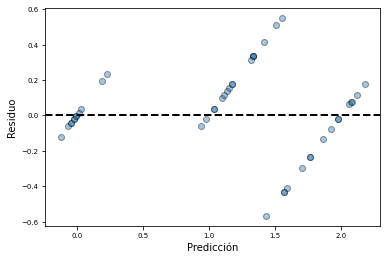

In [ ]:
plt.scatter(prediccion_train, residuos_train,edgecolors=(0, 0, 0), alpha = 0.4)
plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
plt.xlabel('Predicción')
plt.ylabel('Residuo')
plt.tick_params(labelsize = 7)